# import libraries

In [1]:
# import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import pickle
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from nltk.stem import WordNetLemmatizer
import warnings
warnings.filterwarnings("ignore")

# Step 1: Data load & Understanding

In [2]:
# Load dataset
df = pd.read_csv("Reviews.csv")
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [3]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
df.tail()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...
568453,568454,B001LR2CU2,A3LGQPJCZVL9UC,srfell17,0,0,5,1338422400,Great Honey,"I am very satisfied ,product is as advertised,..."


In [5]:
# understand each and every column in dataset
df.columns


Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [7]:
df.shape

(568454, 10)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [9]:
df.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [10]:
df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


# Step 2: Data Preprocessing

In [20]:
#Drop unimportant columns
df.drop(columns=['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Time', 'Summary'], inplace=True)


In [22]:
df

,Score,Text
0,5,I have bought several of the Vitality canned d...
1,1,Product arrived labeled as Jumbo Salted Peanut...
2,4,This is a confection that has been around a fe...
3,2,If you are looking for the secret ingredient i...
4,5,Great taffy at a great price. There was a wid...
...,...,...
568449,5,Great for sesame chicken..this is a good if no...
568450,2,I'm disappointed with the flavor. The chocolat...
568451,5,"These stars are small, so you can give 10-15 o..."
568452,5,These are the BEST treats for training and rew...


In [24]:
# Step 1: Convert Ratings to Sentiment Labels
def sentiment_label(score):
    if score >= 3:
        return "Positive"
    else:
        return "Negative"

df['Sentiment'] = df['Score'].apply(sentiment_label)


In [26]:
df['Sentiment'].value_counts()

Sentiment
Positive    486417
Negative     82037
Name: count, dtype: int64

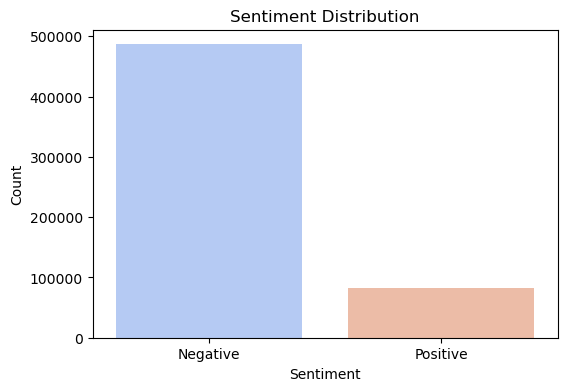

In [59]:
# Plot sentiment distribution before balancing
plt.figure(figsize=(6, 4))
sns.countplot(x=df["Sentiment"], palette="coolwarm")
plt.title("Sentiment Distribution")
plt.xticks(ticks=[0, 1], labels=["Negative", "Positive"])
plt.ylabel("Count")
plt.show()

# Step 3: Text Cleaning
- Remove stopwords
- tokenization
- remove special character
- lemmitization

In [28]:
# Download necessary NLTK resources
nltk.download("punkt")
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pavan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pavan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [30]:
# Initialize Lemmatizer
lemmatizer = WordNetLemmatizer()
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r"[^a-zA-Z]", " ", text)  # Remove special characters
    words = word_tokenize(text)  # Tokenize words
    processed_words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]  # Apply Lemmatization
    return " ".join(processed_words)

# Apply preprocessing to all rows
df["Cleaned_Text"] = df["Text"].astype(str).apply(preprocess_text)

In [31]:
df["Cleaned_Text"]

0         bought several vitality canned dog food produc...
1         product arrived labeled jumbo salted peanut pe...
2         confection around century light pillowy citrus...
3         looking secret ingredient robitussin believe f...
4         great taffy great price wide assortment yummy ...
                                ...                        
568449    great sesame chicken good better resturants ea...
568450    disappointed flavor chocolate note especially ...
568451    star small give one training session tried tra...
568452    best treat training rewarding dog good groomin...
568453    satisfied product advertised use cereal raw vi...
Name: Cleaned_Text, Length: 568454, dtype: object

# Step 4: Handling imbalance data
- #### Balance the dataset using undersampling

In [34]:
from sklearn.utils import resample

# Separate majority (Positive) and minority (Negative) classes
positive_reviews = df[df["Sentiment"] == "Positive"]
negative_reviews = df[df["Sentiment"] == "Negative"]

# Undersample Positive reviews to match Negative count
positive_sampled = resample(positive_reviews, 
                            replace=False, 
                            n_samples=len(negative_reviews), 
                            random_state=42)

# Combine balanced dataset
df = pd.concat([positive_sampled, negative_reviews]).sample(frac=1, random_state=42).reset_index(drop=True)

# Check new class balance
print(df["Sentiment"].value_counts())

Sentiment
Positive    82037
Negative    82037
Name: count, dtype: int64


# Step 5: Exploratory Data Analysis

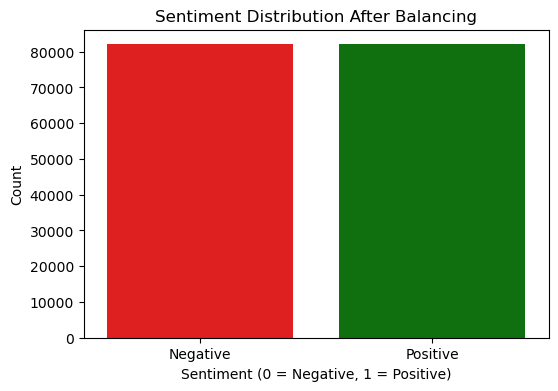

In [36]:
# Check Sentiment Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=df["Sentiment"], palette=["red", "green"])
plt.title("Sentiment Distribution After Balancing")
plt.xlabel("Sentiment (0 = Negative, 1 = Positive)")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=["Negative", "Positive"])
plt.show()

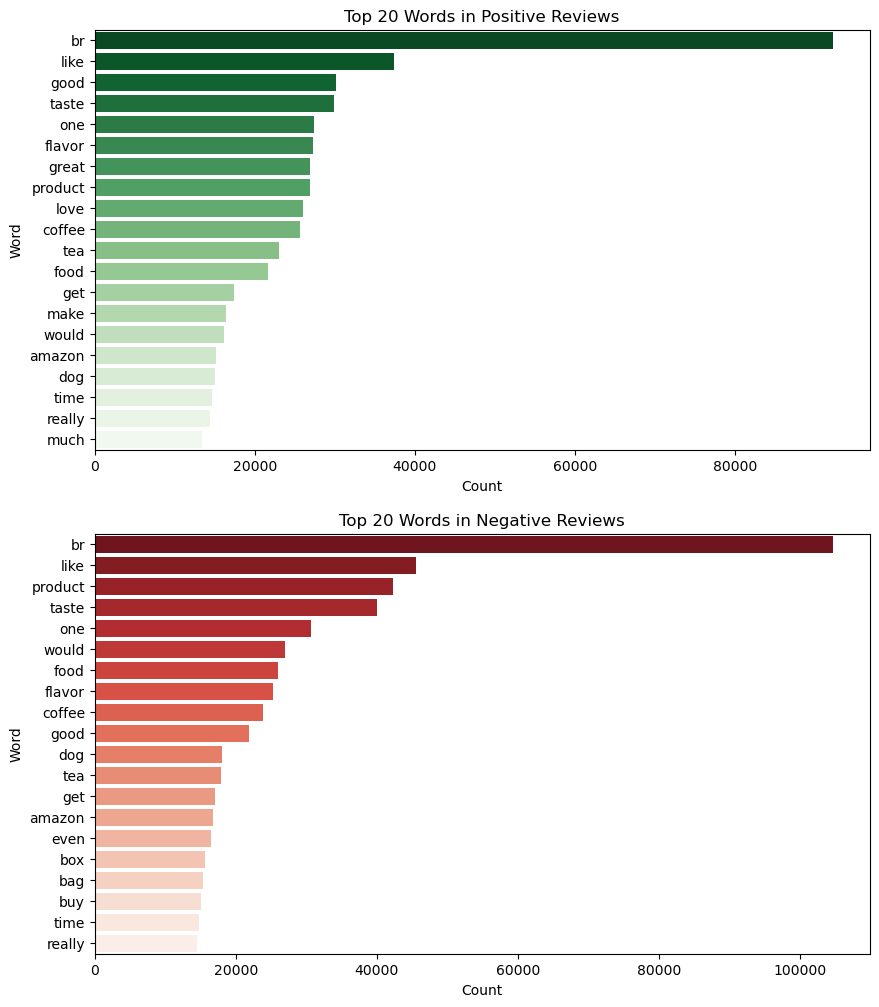

In [40]:
from wordcloud import WordCloud
from collections import Counter
#Word Frequency Analysis
positive_words = " ".join(df[df["Sentiment"] == 'Positive']["Cleaned_Text"])
negative_words = " ".join(df[df["Sentiment"] == 'Negative']["Cleaned_Text"])

# Get most common words
positive_word_freq = Counter(positive_words.split()).most_common(20)
negative_word_freq = Counter(negative_words.split()).most_common(20)

# Convert to DataFrame for visualization
positive_df = pd.DataFrame(positive_word_freq, columns=["Word", "Count"])
negative_df = pd.DataFrame(negative_word_freq, columns=["Word", "Count"])

# Plot Most Common Words
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

sns.barplot(x="Count", y="Word", data=positive_df, ax=axes[0], palette="Greens_r")
axes[0].set_title("Top 20 Words in Positive Reviews")

sns.barplot(x="Count", y="Word", data=negative_df, ax=axes[1], palette="Reds_r")
axes[1].set_title("Top 20 Words in Negative Reviews")

plt.show()




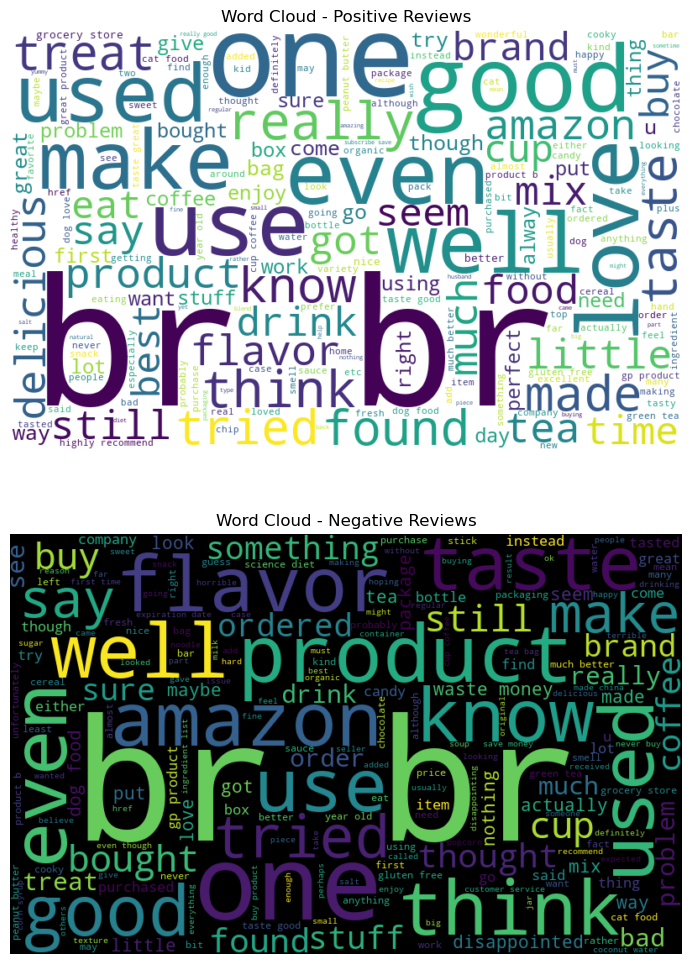

In [108]:
#  Word Cloud for Visualization
positive_wordcloud = WordCloud(width=800, height=500, background_color="white").generate(positive_words)
negative_wordcloud = WordCloud(width=800, height=500, background_color="black").generate(negative_words)

fig, axes = plt.subplots(2, 1, figsize=(12, 12))
axes[0].imshow(positive_wordcloud, interpolation="bilinear")
axes[0].axis("off")
axes[0].set_title("Word Cloud - Positive Reviews")

axes[1].imshow(negative_wordcloud, interpolation="bilinear")
axes[1].axis("off")
axes[1].set_title("Word Cloud - Negative Reviews")

plt.show()

# Step 6: Convert Text into Features (TF-IDF Vectorization)

In [42]:
# Convert Text to TF-IDF Features
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Cleaned_Text'])
y = df['Sentiment'].map({'Positive': 1, 'Negative': 0})


In [43]:
print(X)
print(y)

  (0, 5630)	0.28065470113554414
  (0, 3630)	0.20314648906293317
  (0, 22194)	0.18810746494674493
  (0, 13128)	0.24752092489208435
  (0, 5980)	0.18065558065241957
  (0, 57922)	0.24484677165007418
  (0, 49290)	0.28707668365885536
  (0, 35582)	0.2296231975705984
  (0, 10009)	0.3350139642622006
  (0, 19741)	0.13748707168911867
  (0, 3423)	0.3307906140909824
  (0, 5341)	0.5030236659235003
  (0, 33878)	0.24898777184879697
  (1, 54431)	0.05857048340504688
  (1, 7354)	0.08451385745107848
  (1, 36832)	0.09996620405521739
  (1, 30830)	0.048969269079018385
  (1, 1573)	0.05671301673446485
  (1, 14839)	0.1007085002110047
  (1, 56167)	0.07412489354308534
  (1, 22756)	0.04938594753647767
  (1, 47642)	0.08832749240973374
  (1, 50228)	0.1133165834179449
  (1, 5135)	0.06887218312768756
  (1, 8782)	0.16135528834006335
  :	:
  (164073, 9203)	0.23010709427764592
  (164073, 11325)	0.18550253427693056
  (164073, 53645)	0.15531195758918576
  (164073, 18513)	0.4099819153185867
  (164073, 44219)	0.2649882900882

# Step 7: Train-Test Split

In [46]:
# Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 8: Train Naïve Bayes Model

In [48]:
# Train Naïve Bayes Model
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [50]:
#Prediction
ypred_train=model.predict(X_train)
ypred_test=model.predict(X_test)

In [52]:
from sklearn.metrics import accuracy_score
print('train_accuracy:',accuracy_score(y_train,ypred_train))
print('test_accuracy:',accuracy_score(y_test,ypred_test))
print(classification_report(y_test, ypred_test))                         

train_accuracy: 0.8724582695281847
test_accuracy: 0.8519274721925949
              precision    recall  f1-score   support

           0       0.85      0.85      0.85     16382
           1       0.85      0.85      0.85     16433

    accuracy                           0.85     32815
   macro avg       0.85      0.85      0.85     32815
weighted avg       0.85      0.85      0.85     32815



# step 9: Save model

In [55]:
# Save Model and Vectorizer
with open("naive_bayes_model.pkl", "wb") as f:
    pickle.dump(model, f)

with open("tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)

print("Model and vectorizer saved successfully!")


Model and vectorizer saved successfully!
